In [1]:
from utils import ModelImporter, Preprocessing, Metrics
import torch
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
%reload_ext autoreload

# Analize Model with the Public Test Data

In [2]:
#load data
pre = Preprocessing('fer2013')
pre.load_data(filename='test_private_norm.csv', name='test')

X_df = pre.get(name='test').drop(columns=['emotion'])
y_df = pre.get(name='test')['emotion']

In [4]:
dtype = torch.float
device = torch.device("cpu")

n_classes = 7
n_epochs = 100
learning_rate = 0.001
batch_size = 128

loss_ep_n = 10
acc_ep_n = 90
f1_ep_n = 25
bs_ep_n = 85

m_importer = ModelImporter('fer2013_DatasetD')

In [5]:
model_name = f'cnn_multi5_layer_D_bs_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{bs_ep_n}'
model = m_importer.load_nn_model(model_name)

['cnn_multi5_layer_D_bs_0.001_128_100_7', 1, 7, [48, 48], 64, 128, 256, 128, 64, 2]
load model CnnMulti5Layer(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.2)
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 64, kernel_size=(

In [6]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)

In [7]:
y_pred_prob = model(X_test)

In [8]:
y_pred = y_pred_prob.argmax(1)

In [9]:
accuracy_soft = (y_pred == y_test).float().mean()
accuracy_soft

tensor(0.6241)

In [8]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
labels_num = [0, 1, 2, 3, 4, 5, 6]
metrics = Metrics(y_test, y_pred, labels, labels_num)

<module 'matplotlib.pyplot' from '/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/matplotlib/pyplot.py'>

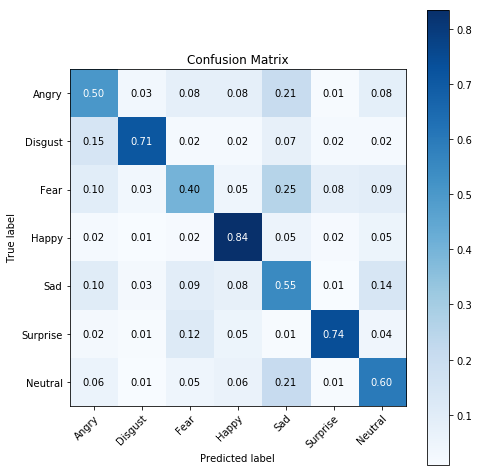

In [11]:
metrics.represent_cm()

In [12]:
metrics.balanced_score()

0.6192935181080406

In [5]:
model_name = f'cnn_multi5_layer_D_bs_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{acc_ep_n}'
model = m_importer.load_nn_model(model_name)

['cnn_multi5_layer_D_bs_0.001_128_100_7', 1, 7, [48, 48], 64, 128, 256, 128, 64, 2]
load model CnnMulti5Layer(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.2)
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 64, kernel_size=(

In [6]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)
y_pred_prob = model(X_test)
y_pred = y_pred_prob.argmax(1)
accuracy_soft = (y_pred == y_test).float().mean()
accuracy_soft

tensor(0.6269)

In [12]:
metrics = Metrics(y_test, y_pred, labels, labels_num)

<module 'matplotlib.pyplot' from '/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/matplotlib/pyplot.py'>

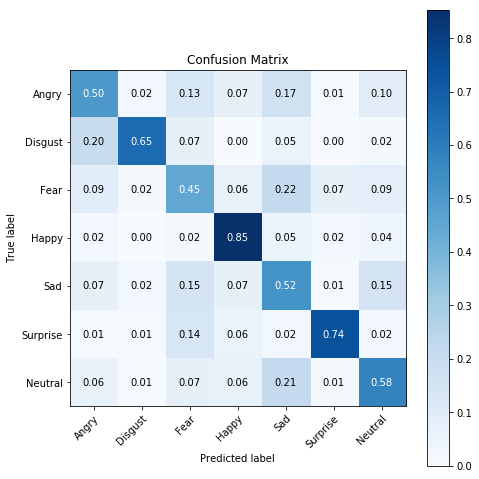

In [13]:
metrics.represent_cm()

In [14]:
metrics.balanced_score()

0.6144419485369504